In [1]:
from impact_models import ExpDecayTransient, PowerDecayTransient, PowerImpact,ConcaveConvexImpact, ConcaveConvexKatoImpact
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from IPython.display import Markdown as md

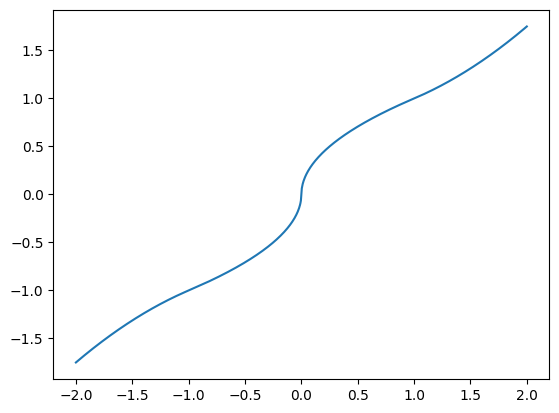

In [28]:
ccki = ConcaveConvexKatoImpact(0.5, 2, lam=1, x_threshold=1)
ccki.plot(span=2, N=1001)


$$ \int_0^T v(t) \int_0^t G(t-s)v(s)dsdt $$
$$ \sum_{i=1}^{N} \int_{t_i -1}^{t_i} v(t) \int_0^{t_i} G(t-s)v(s)dsdt $$
$$ \sum_{i=1}^{N} \int_{t_i -1}^{t_i} v(t) \sum_{j=1}^{j=i} \int_{t_j-1}^{t_j} G(t-s)v(s)dsdt $$
$$ \sum_{i=1}^{N} \sum_{j=1}^{j=i} \int_{t_i -1}^{t_i} v(t)  \int_{t_j-1}^{t_j} G(t-s)v(s)dsdt $$
Assuming v(t) = $v(t_i)$ on $[t_{i-1}, t_i)$

$$ \sum_{i=1}^{N} \sum_{j=1}^{j=i} \int_{t_i -1}^{t_i} v(t)  \int_{t_j-1}^{t_j} G(t-s)v(s)dsdt $$
$$ \sum_{i=1}^{N} \sum_{j=1}^{j=i} v(t_i)v(t_j) \int_{t_{i-1}}^{t_i}   \int_{t_{j-1}}^{t_j} G(t-s)dsdt = \sum_{i=1}^{N} \sum_{j=1}^{j=i} v_iv_j G_{ij}$$
$ t_i = i\Delta t = i\frac{T}{N} $

note, for $j<i$, we have $\int_{t_{i-1}}^{t_i}   \int_{t_{j-1}}^{t_j}$, but for i=j we have  $\int_{t_{i-1}}^{t_i}   \int_{t_{i-1}}^{t}$

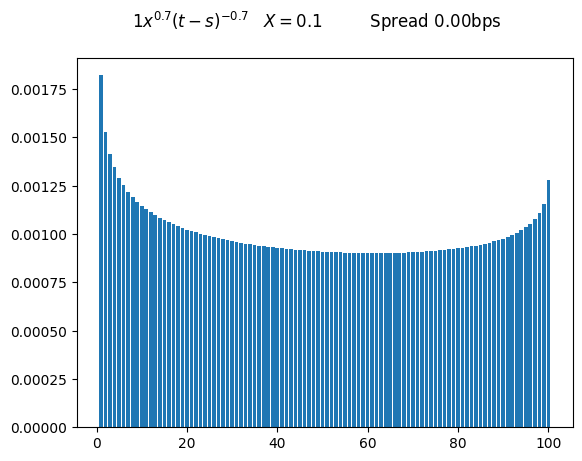

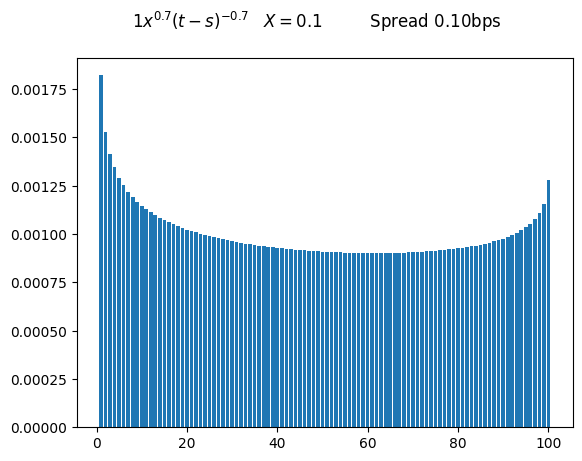

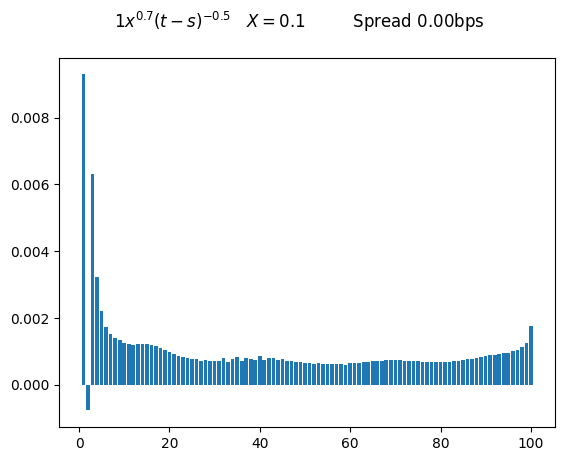

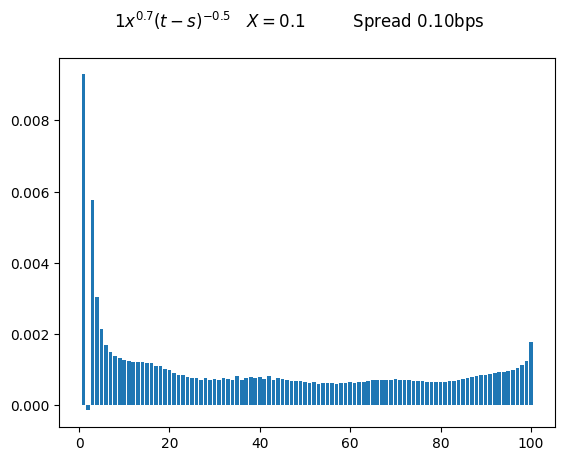

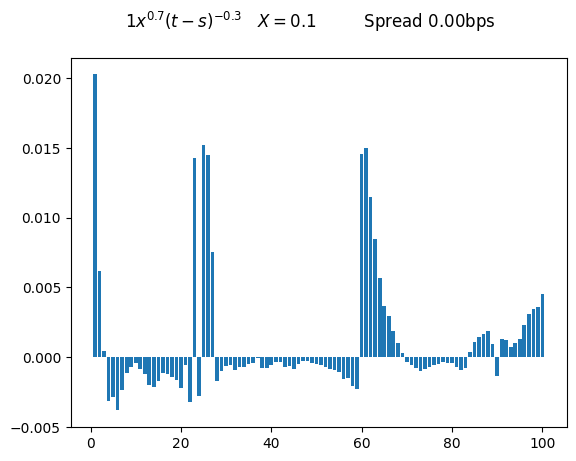

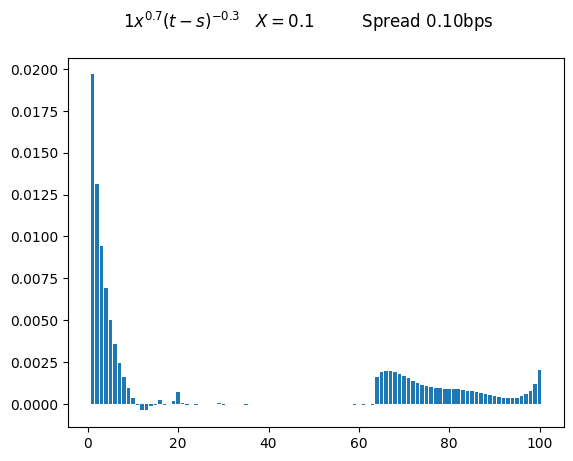

In [29]:
delta = 0.7
total_volume = 0.1

for power_decay in [0.7, 0.5, 0.3]:
    for spread in [0, 0.1]:
        td = PowerDecayTransient(power_decay=power_decay, impact_func=PowerImpact(delta), total_volume=total_volume, spread=spread)
        result = td.optimal_execution()
        td.plot_volume(result.x)


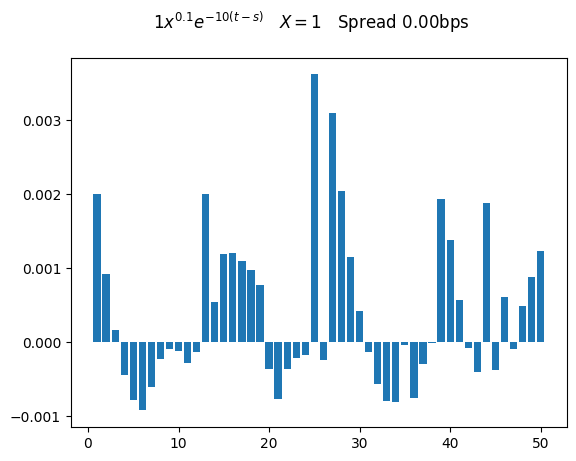

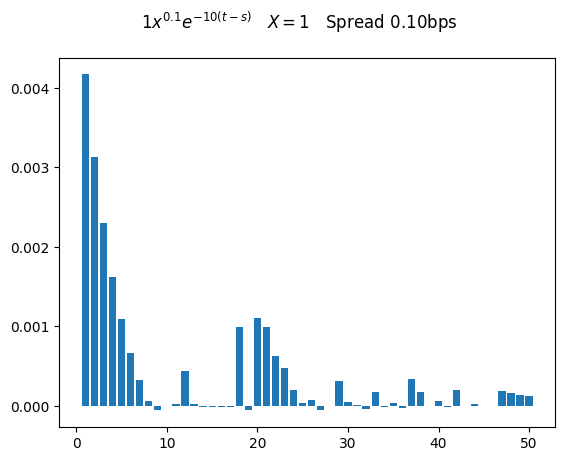

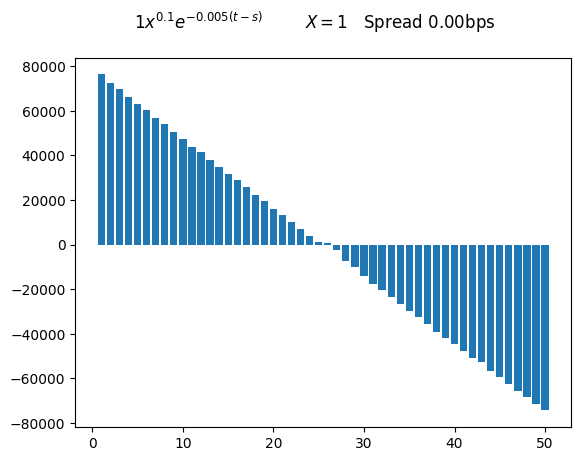

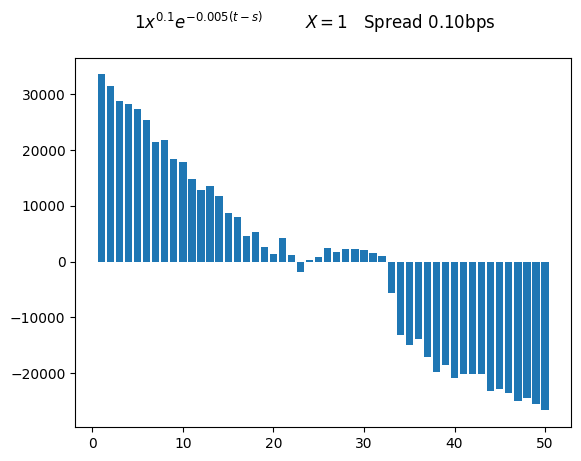

In [30]:
delta = 0.1
total_volume = 1

for beta in [10,0.005]: 
    for spread in [0, 0.1]:
        td = ExpDecayTransient(beta=beta,N=50, impact_func=PowerImpact(delta), total_volume=total_volume, spread=spread)
        result = td.optimal_execution()
        td.plot_volume(result.x*td.Delta)

trading 1.0 % of ADV


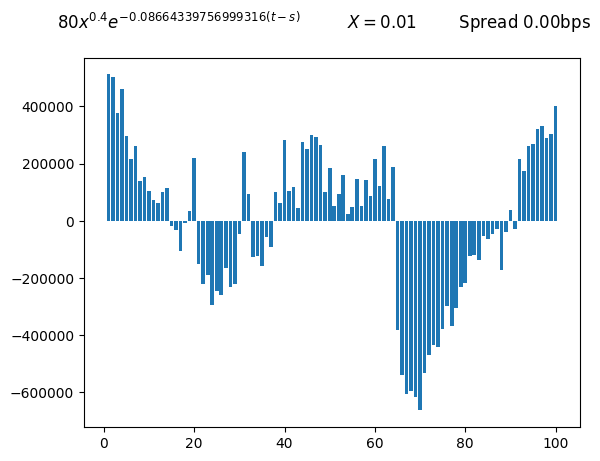

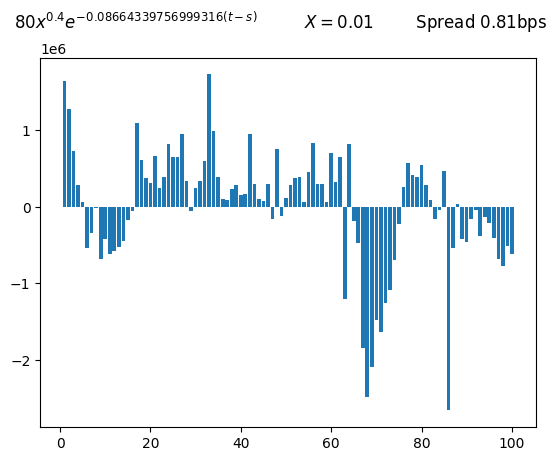

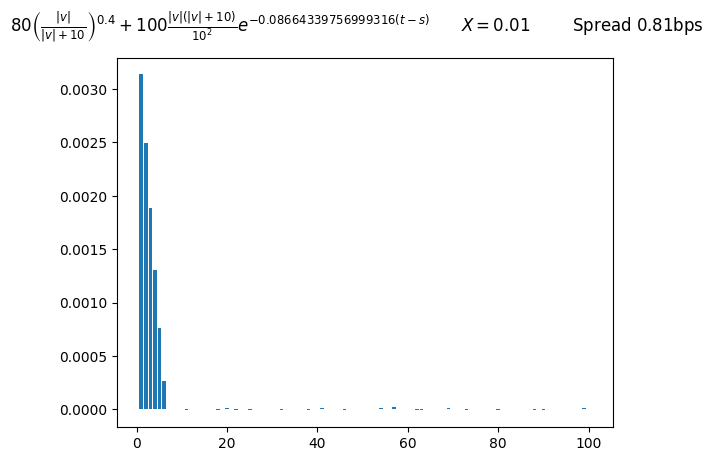

In [32]:
beta = np.log(2) / 1 / 8

total_volume = 0.01
print(f"trading {100*total_volume} % of ADV" )

spread_width=5
stdev = 0.0002
spread = (2.5)/15375.25/ stdev #NQ
delta = 0.4 #NQ
lam = 80


impact_func1= PowerImpact(delta, lam)

impact_func2 = ConcaveConvexImpact(delta, d=100, v_critical=10, lam=lam)

td = ExpDecayTransient(beta=beta, impact_func=impact_func1, total_volume=total_volume, spread=0)
result = td.optimal_execution()
td.plot_volume(result.x)

for impact_func in [impact_func1, impact_func2]:
    td = ExpDecayTransient(beta=beta, impact_func=impact_func, total_volume=total_volume, spread=spread)
    result = td.optimal_execution()
    td.plot_volume(result.x)
    

PowerImpact(delta=0.5, lam=80)
ConcaveConvexKatoImpact(delta_1=0.5, delta_2=1, lam=80, x_threshold=0.02, alpha=282.842712474619, gamma=5.656854249492379)
ConcaveConvexImpact(delta=0.5, d=1, v_critical=1, lam=80)


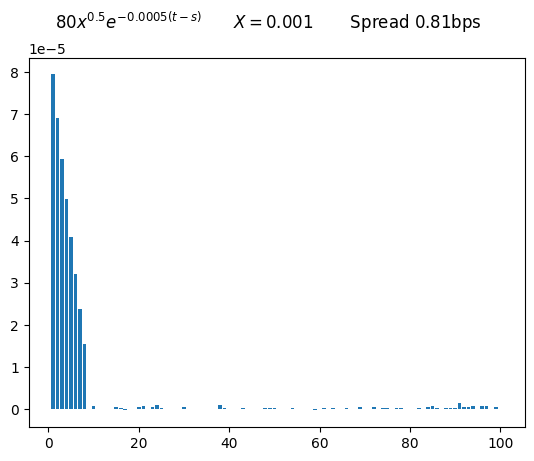

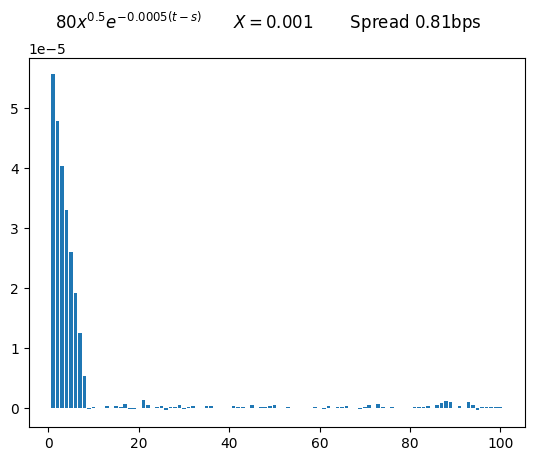

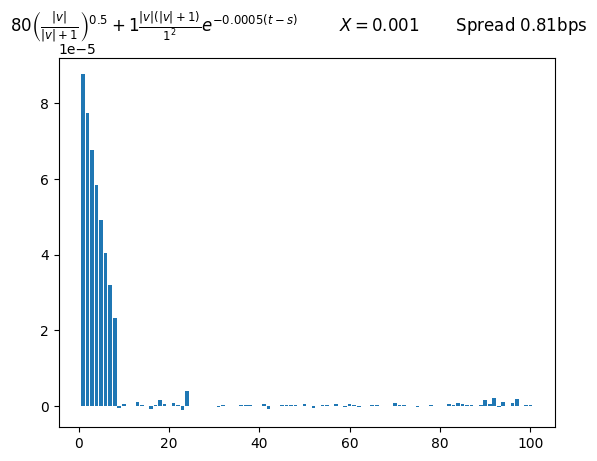

In [35]:
delta = 0.5
lam = 80
beta = 0.0005
stdev = 0.0002
spread = (2.5)/15375.25/ stdev
total_volume = 0.001

ccki = ConcaveConvexKatoImpact(delta_1=delta, delta_2=1, lam=lam, x_threshold=0.02)
cci = ConcaveConvexImpact(delta=delta, lam=lam,d=1)
pi = PowerImpact(delta=delta, lam=lam)

for impact in [pi, ccki,  cci]:
    print(impact)
    td = ExpDecayTransient(beta=beta, impact_func=impact, total_volume=total_volume, spread=spread)
    result = td.optimal_execution()
    td.plot_volume(result.x)

In [34]:
beta=np.log(2)/

N=int(100)
bps_alpha = 80/100/100
alpha = np.linspace(bps_alpha, 0 , N)

fig, ax = plt.subplots(1)
ax.plot(np.linspace(1, N, N), alpha)
fig.suptitle(f"Linear alpha {bps_alpha*100*100}bps")

for impact in [ccki, pi, cci]:
    td = ExpDecayTransient(beta=beta, impact_func=impact, N=N, total_volume=total_volume, spread=spread, alpha=alpha)
    result = td.optimal_execution()
    td.plot_volume(result.x)

SyntaxError: invalid syntax (234363316.py, line 1)

48
x=0.69315. impact_func=PowerImpact(delta=0.55, lam=28.385071138686037)
x=0.69315. impact_func=ConcaveConvexKatoImpact(delta_1=0.55, delta_2=2, lam=28.385071138686037, x_threshold=1, alpha=7.8058945631386605, gamma=20.579176575547375)
x=1.00000. impact_func=PowerImpact(delta=0.55, lam=28.385071138686037)
x=1.00000. impact_func=ConcaveConvexKatoImpact(delta_1=0.55, delta_2=2, lam=28.385071138686037, x_threshold=1, alpha=7.8058945631386605, gamma=20.579176575547375)


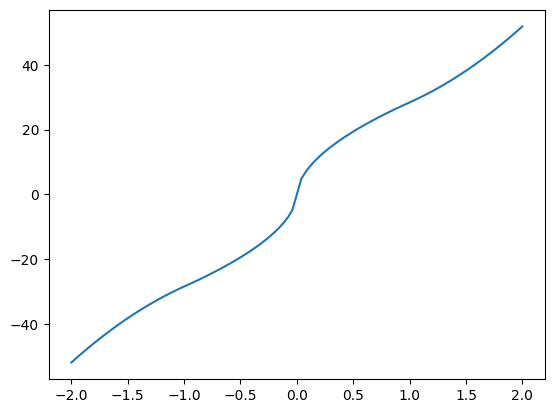

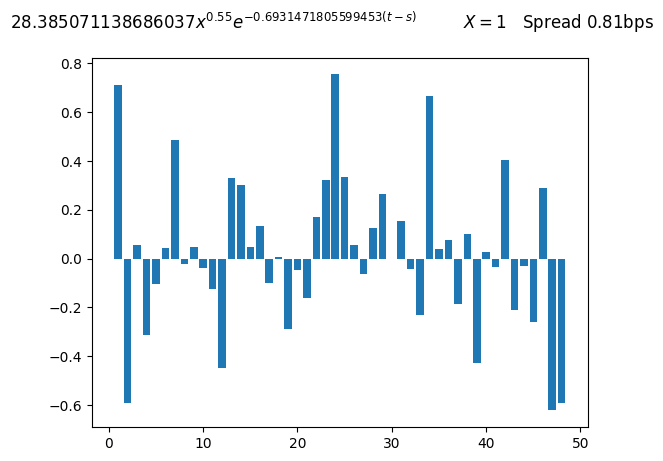

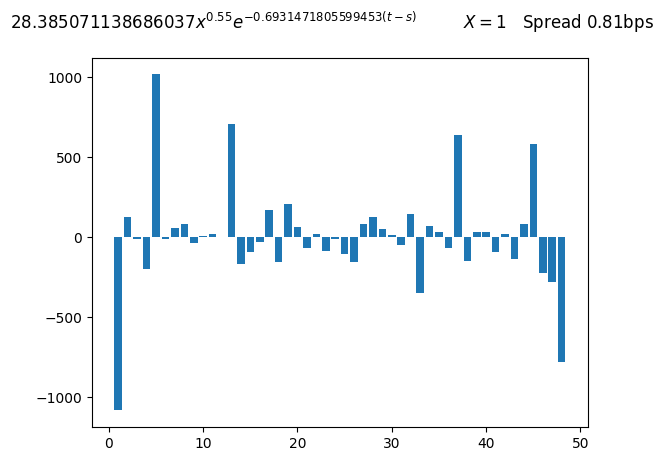

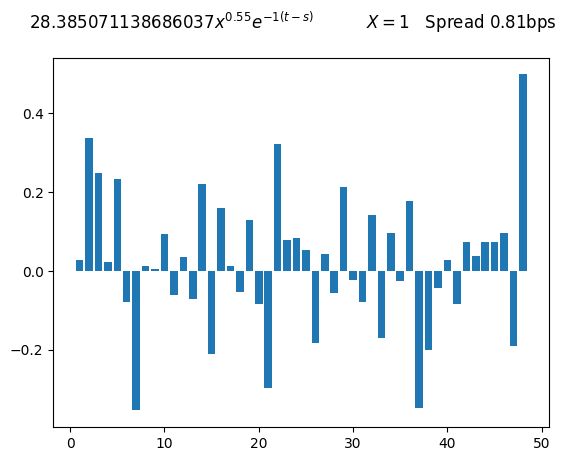

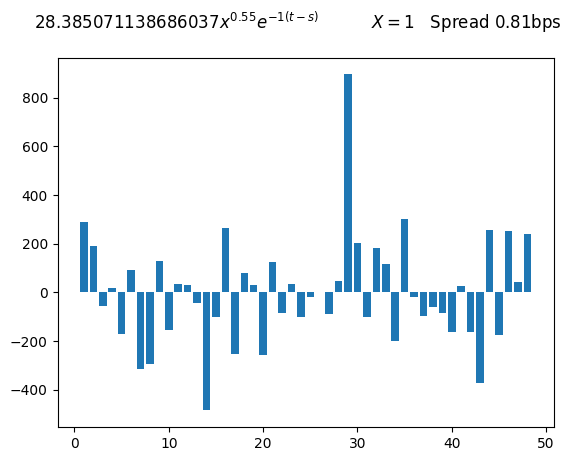

In [16]:
half_life_s = 1
beta = np.log(2) / half_life_s

hours = 8
T = hours*60*60
bin_size = 10*60
N = int(T/bin_size)
print(N)
total_volume = 1

spread = (2.5)/15375.25/0.0002  # NQ

delta = 0.55  # NQ
lam = 80/(10**(1-delta))


pi = PowerImpact(delta, lam=lam)
ccki = ConcaveConvexKatoImpact(delta_1=delta, lam=lam, delta_2=2)
ccki.plot()


for x in [beta, 1]:
    for impact_func in [pi, ccki]:
        print(f"{x=:.5F}. {impact_func=}")
        td = ExpDecayTransient(beta=x, N=N, T=T, 
                            impact_func=impact_func, total_volume=total_volume,
                            spread=spread)
        result = td.optimal_execution()
        td.plot_volume(result.x)